In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import kagglehub

# Download latest version
path = kagglehub.dataset_download("meeraajayakumar/spotify-user-behavior-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/sonja/.cache/kagglehub/datasets/meeraajayakumar/spotify-user-behavior-dataset/versions/1


In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


Project: **Understanding Spotify User Behavior: A Data Analysis Study**

Aim 1: Determine whether Users are willing to take premium subscription or Not using Supervised Machine learning models.

Aim 2: To find whether there exist a pattern of what device users prefer Depending upon their Music listening Mood using K Means Clustering.

In [5]:
#Importing the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
df=pd.read_excel("/Users/sonja/.cache/kagglehub/datasets/meeraajayakumar/spotify-user-behavior-dataset/versions/1/Spotify_data.xlsx")
df

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,NaN,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,NaN,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,NaN,NaN,NaN,NaN,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,20-35,Female,More than 2 years,"Smartphone, Computer or laptop, Wearable devices",Free (ad-supported),Yes,Student Plan-Rs 59/month,Music,Pop,Morning,"Uplifting and motivational, Sadness or melancholy",While Traveling,recommendations,5,Rarely,Lifestyle and Health,Conversational,Both,Shorter,Ok
516,20-35,Female,More than 2 years,"Smartphone, Computer or laptop",Free (ad-supported),Yes,Student Plan-Rs 59/month,Music,Pop,Night,"Relaxation and stress relief, Uplifting and mo...","While Traveling, Workout session, leisure time",Others,2,Rarely,Comedy,Story telling,Both,Shorter,Ok
517,20-35,Female,More than 2 years,Smartphone,Free (ad-supported),No,Student Plan-Rs 59/month,Music,Pop,Night,Relaxation and stress relief,leisure time,recommendations,3,Never,NaN,Story telling,Both,Shorter,Ok
518,20-35,Female,6 months to 1 year,Smartphone,Premium (paid subscription),Yes,Individual Plan- Rs 119/ month,Music,Melody,Night,"Relaxation and stress relief, Uplifting and mo...","Workout session, leisure time","recommendations, Others",2,Several times a week,Comedy,Conversational,Both,Longer,Satisfied


In [6]:
#Creating a copy for Clustering
df1=df.copy()

In [7]:
#Checking Datatypes
df.dtypes

Age                            object
Gender                         object
spotify_usage_period           object
spotify_listening_device       object
spotify_subscription_plan      object
premium_sub_willingness        object
preffered_premium_plan         object
preferred_listening_content    object
fav_music_genre                object
music_time_slot                object
music_Influencial_mood         object
music_lis_frequency            object
music_expl_method              object
music_recc_rating               int64
pod_lis_frequency              object
fav_pod_genre                  object
preffered_pod_format           object
pod_host_preference            object
preffered_pod_duration         object
pod_variety_satisfaction       object
dtype: object

In [8]:
#Checking Missing Values
df.isna().sum()

Age                              0
Gender                           0
spotify_usage_period             0
spotify_listening_device         0
spotify_subscription_plan        0
premium_sub_willingness          0
preffered_premium_plan         208
preferred_listening_content      0
fav_music_genre                  0
music_time_slot                  0
music_Influencial_mood           0
music_lis_frequency              0
music_expl_method                0
music_recc_rating                0
pod_lis_frequency                0
fav_pod_genre                  148
preffered_pod_format           140
pod_host_preference            141
preffered_pod_duration         129
pod_variety_satisfaction         0
dtype: int64

**Exploratory Data Analysis**

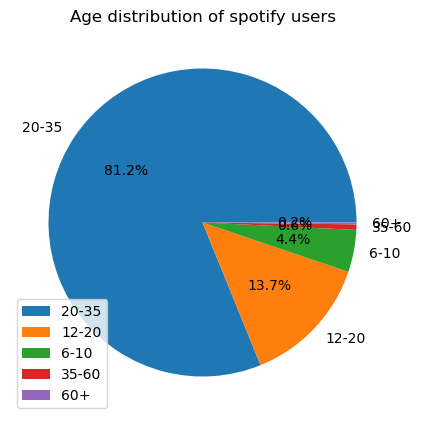

In [245]:
#Age group
y=df['Age'].value_counts()
plt.figure(figsize=(5,5))
labels=['20-35','12-20','6-10','35-60','60+']
plt.pie(y,labels=labels,autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.title('Age distribution of spotify users')
plt.show()

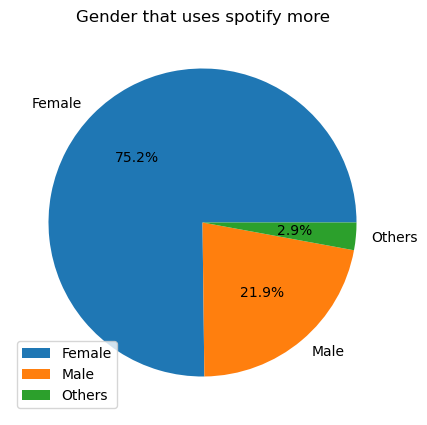

In [11]:
#Gender
y=df['Gender'].value_counts()
plt.figure(figsize=(5,5))
labels=['Female','Male','Others']
plt.pie(y,labels=labels,autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.title('Gender that uses spotify more')
plt.show()

<Axes: xlabel='spotify_subscription_plan', ylabel='count'>

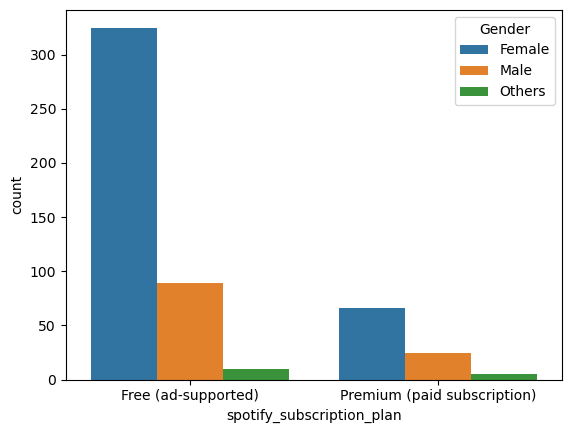

In [12]:
#spotify subscription plan
sns.countplot(x='spotify_subscription_plan',data=df,hue='Gender')

<Axes: xlabel='premium_sub_willingness', ylabel='count'>

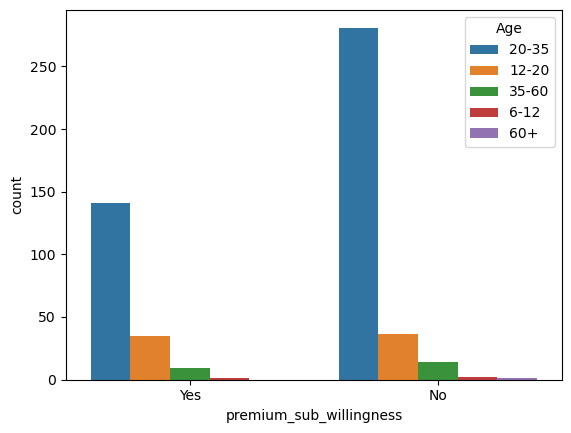

In [13]:
#willingness to take subscription
sns.countplot(x='premium_sub_willingness',data=df,hue='Age')

preffered_premium_plan
Individual Plan- Rs 119/ month    95
Student Plan-Rs 59/month          94
Duo plan- Rs 149/month            84
Family Plan-Rs 179/month          39
Name: count, dtype: int64


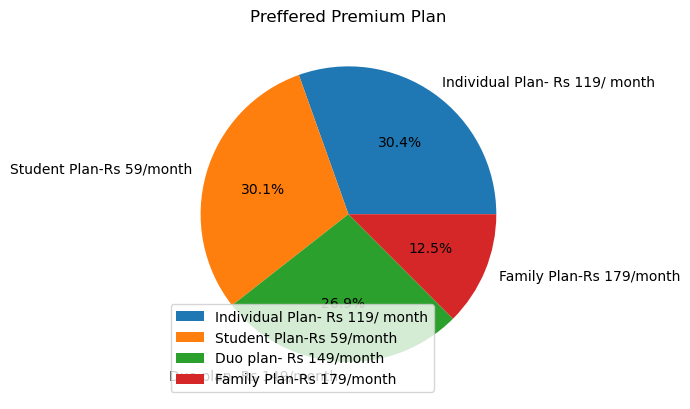

In [45]:
c = df['preffered_premium_plan'].value_counts()
print(c)
labels = ['Individual Plan- Rs 119/ month', 'Student Plan-Rs 59/month', 'Duo plan- Rs 149/month','Family Plan-Rs 179/month']
plt.pie(c,labels=labels, autopct = '%1.1f%%')
plt.legend(loc='lower left')
plt.title('Preffered Premium Plan')
plt.show()

In [47]:
df['preffered_premium_plan'].value_counts()

preffered_premium_plan
Individual Plan- Rs 119/ month    95
Student Plan-Rs 59/month          94
Duo plan- Rs 149/month            84
Family Plan-Rs 179/month          39
Name: count, dtype: int64

/var/folders/9r/jrfqnhl94_zfjg01kkrts03r0000gn/T/ipykernel_96680/551490072.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  p.set_xticklabels(new_labels)


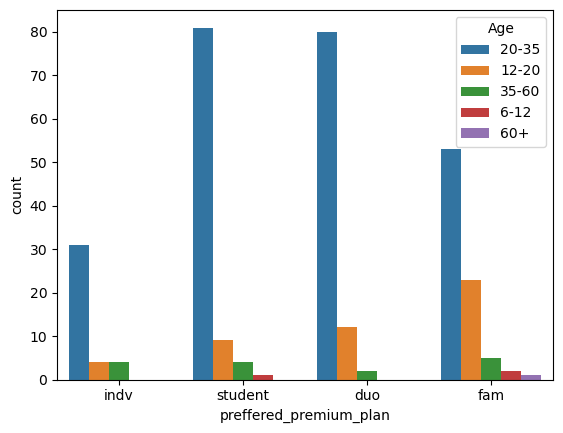

In [48]:
p = sns.countplot(x='preffered_premium_plan',data=df,hue='Age')
new_labels = ['indv','student', 'duo', 'fam'] 
p.set_xticklabels(new_labels)

# Show plot
plt.show()

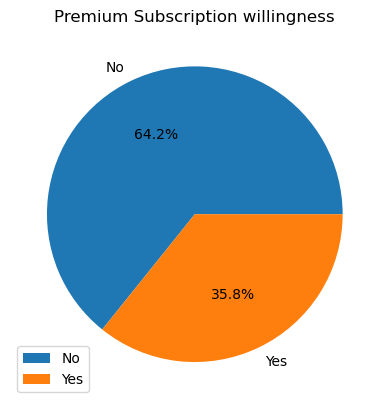

In [49]:
#Premium Subscription willingness
y3=df['premium_sub_willingness'].value_counts()
labels=['No','Yes']
plt.pie(y3,labels=labels,autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.title('Premium Subscription willingness')
plt.show()

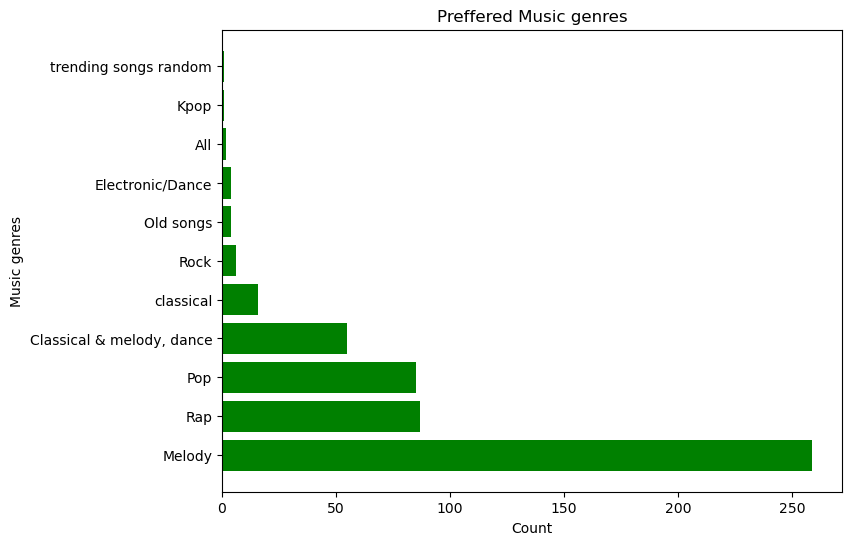

In [50]:
#fav genre
fig,ax=plt.subplots(figsize=(8,6))
y2=df['fav_music_genre'].value_counts().values
x2=df['fav_music_genre'].unique()
plt.barh(x2,y2,color='g')
plt.xlabel('Count')
plt.ylabel('Music genres')
plt.title('Preffered Music genres')
plt.show()

In [191]:
# Exclude columns related to 'spotify_subscription_plan' and 'preffered_premium_plan'
data_one_hot = pd.get_dummies(df, drop_first=True)
excluded_columns = [
    col for col in data_one_hot.columns 
    if 'spotify_subscription_plan' in col or 'preffered_premium_plan' in col
]
data_filtered = data_one_hot.drop(columns=excluded_columns)

# Recalculate correlations with the target variable after exclusion
correlation_matrix_filtered = data_filtered.corr()
correlation_with_target_filtered = correlation_matrix_filtered['premium_sub_willingness'].sort_values(ascending=False)

# Display the top correlations after excluding the identified features
correlation_with_target_filtered.head(15)


premium_sub_willingness        1.000000
preferred_listening_content    0.281493
music_Influencial_mood         0.205538
fav_music_genre                0.185914
pod_variety_satisfaction       0.153588
pod_lis_frequency              0.089717
music_expl_method              0.082585
Gender                         0.051288
music_recc_rating             -0.064430
fav_pod_genre                 -0.069915
spotify_usage_period          -0.070277
pod_host_preference           -0.072557
music_lis_frequency           -0.073545
preffered_pod_format          -0.076103
Age                           -0.086853
Name: premium_sub_willingness, dtype: float64

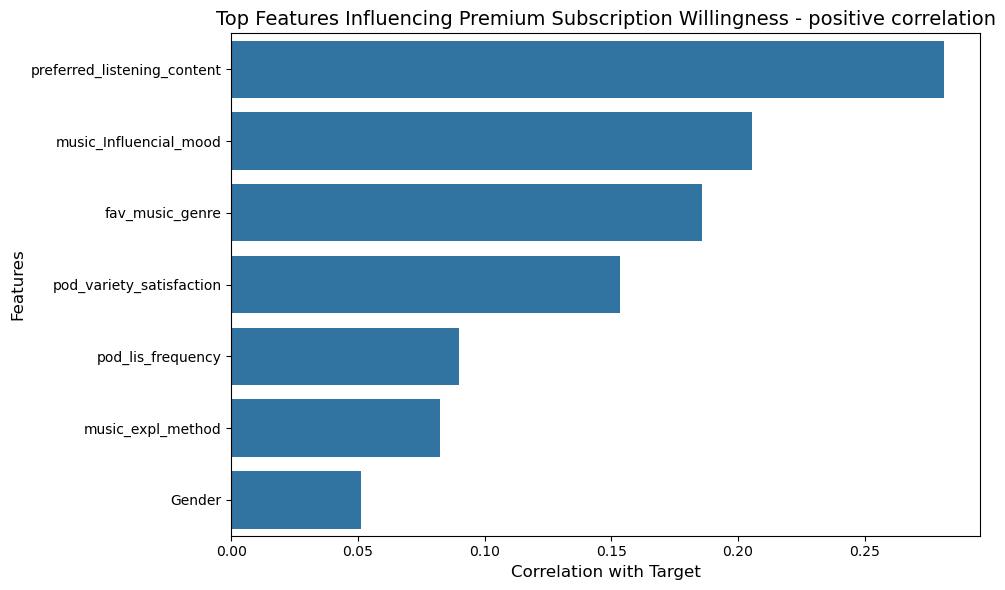

In [213]:
# Select top features excluding the target variable
top_features = correlation_with_target_filtered[1:8]  # Top 10 features excluding 'premium_sub_willingness'

# Plot the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, orient='h')
plt.title("Top Features Influencing Premium Subscription Willingness - positive correlation", fontsize=14)
plt.xlabel("Correlation with Target", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.tight_layout()
plt.show()


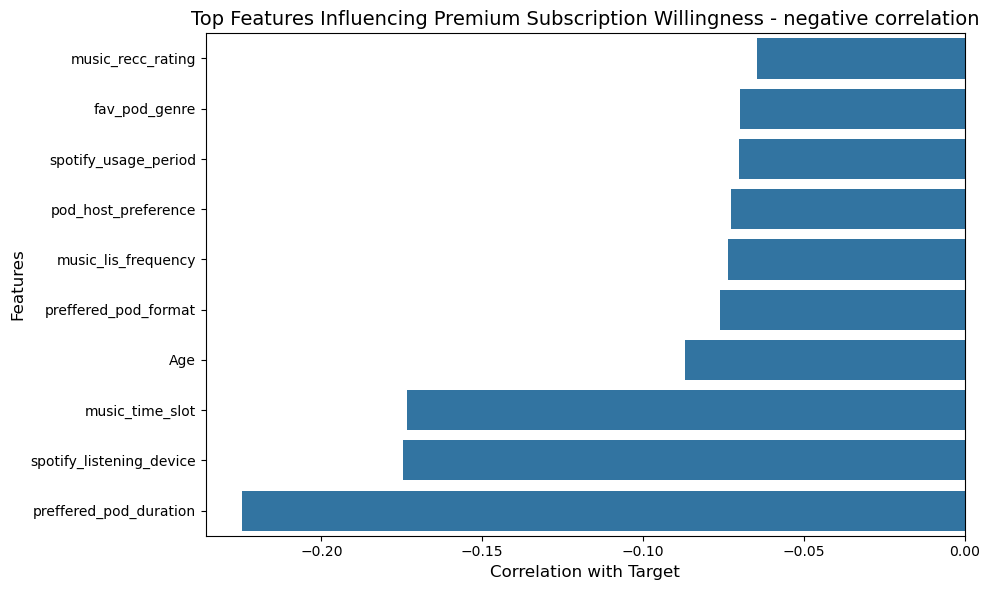

In [211]:
# Select top features excluding the target variable
top_features_neg = correlation_with_target_filtered[8:20]  # Top 10 features excluding 'premium_sub_willingness'

# Plot the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features_neg.values, y=top_features_neg.index, orient='h')
plt.title("Top Features Influencing Premium Subscription Willingness - negative correlation", fontsize=14)
plt.xlabel("Correlation with Target", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.tight_layout()
plt.show()


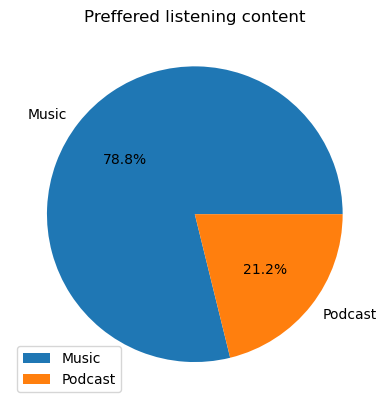

In [51]:
#fav lis content
y3=df['preferred_listening_content'].value_counts()
labels=['Music','Podcast']
plt.pie(y3,labels=labels,autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.title('Preffered listening content')
plt.show()

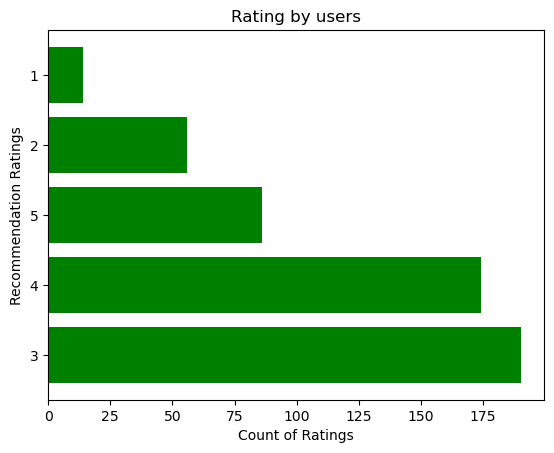

In [52]:
#music recommendation rating
y4=df['music_recc_rating'].value_counts().values
x4=['3','4','5','2','1']
plt.barh(x4,y4,color='g')
plt.xlabel('Count of Ratings')
plt.ylabel('Recommendation Ratings')
plt.title('Rating by users')
plt.show()

In [53]:
le=LabelEncoder()
lst=['Age','Gender','spotify_usage_period','spotify_listening_device','spotify_subscription_plan','premium_sub_willingness','preffered_premium_plan','preferred_listening_content','fav_music_genre','music_time_slot','music_Influencial_mood','music_lis_frequency','music_expl_method','pod_lis_frequency','fav_pod_genre','preffered_pod_format','pod_host_preference','preffered_pod_duration','pod_variety_satisfaction']
for i in lst:
  df[i]=le.fit_transform(df[i])

In [54]:
df

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,1,0,3,4,0,1,1,1,4,2,8,34,4,3,0,1,2,0,0,1
1,0,1,3,0,0,1,2,1,7,0,10,32,4,2,4,1,2,0,3,2
2,2,2,1,4,0,1,3,1,6,2,0,19,4,4,2,16,2,3,0,2
3,1,0,0,11,0,0,4,0,4,2,3,13,13,4,1,19,4,3,3,1
4,1,0,0,6,0,0,4,0,4,2,0,34,13,4,3,10,3,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,1,0,3,10,0,1,3,0,6,1,12,26,10,5,3,10,0,0,2,1
516,1,0,3,7,0,1,3,0,6,2,6,29,0,2,3,1,3,0,2,1
517,1,0,3,6,0,0,3,0,6,2,0,34,10,3,1,19,3,0,2,1
518,1,0,1,6,1,1,2,0,4,2,4,33,11,2,4,1,0,0,1,2


<Axes: >

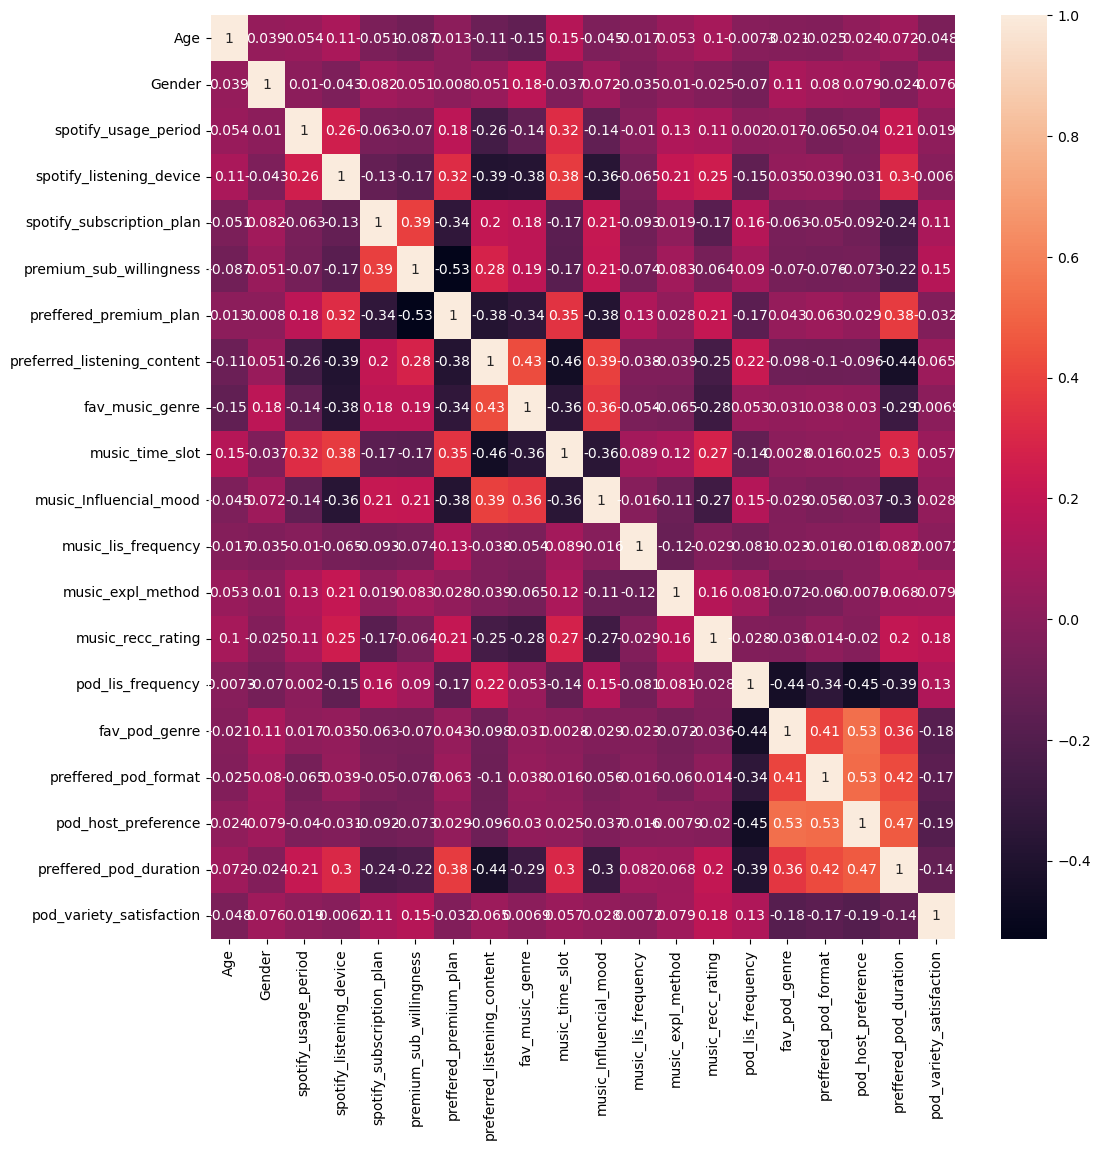

In [55]:
fig, ax = plt.subplots(1,1, figsize = (12,12))
sns.heatmap(df.corr(),annot=True)

**Key Findings from Exploratory Data Analysis**
* The Age group that uses spotify more is between 20-35 followed by 12-20.

* A bigger part of the users comprises of Females than males in my dataset.

* Most of the users prefer free ad supported plan than premium plans and premium users are more of females.

* People between the age group 20-35 uses more of premium plans.

* 35.8 percentage of people are willing to take premium and also willing to continue with the premium subscription plan.

* Most of the people prefer to listen to music than podcast.

* Their favourite music genre is melody.

* Most of the users listens to songs using spotify recommendation and they have given a rating of 3 .





In [57]:
#Splitting the dataset for chisquare test
X=df.drop(['premium_sub_willingness'],axis=1)
y=df['premium_sub_willingness']     

**Chi Square Test for feature selection**

In [59]:
selector = SelectKBest(score_func=chi2, k=15)

In [60]:
X_new = selector.fit_transform(X,y)

In [61]:
selected_feature_indices = selector.get_support(indices=True)

In [62]:
selected_features = X.columns[selected_feature_indices]

In [63]:
selected_features

Index(['spotify_usage_period', 'spotify_listening_device',
       'spotify_subscription_plan', 'preffered_premium_plan',
       'preferred_listening_content', 'fav_music_genre', 'music_time_slot',
       'music_Influencial_mood', 'music_lis_frequency', 'music_expl_method',
       'fav_pod_genre', 'preffered_pod_format', 'pod_host_preference',
       'preffered_pod_duration', 'pod_variety_satisfaction'],
      dtype='object')

In [64]:
#Splitting the dataset for model building
X1=df.drop(['Age','music_recc_rating','fav_pod_genre','preffered_pod_format','premium_sub_willingness'],axis=1)
y=df['premium_sub_willingness']

In [65]:
#minmaxscaler
ms=MinMaxScaler()
Xsc=ms.fit_transform(X1)
Xsc

array([[0.        , 1.        , 0.28571429, ..., 0.        , 0.        ,
        0.25      ],
       [0.5       , 1.        , 0.        , ..., 0.        , 1.        ,
        0.5       ],
       [1.        , 0.33333333, 0.28571429, ..., 1.        , 0.        ,
        0.5       ],
       ...,
       [0.        , 1.        , 0.42857143, ..., 0.        , 0.66666667,
        0.25      ],
       [0.        , 0.33333333, 0.42857143, ..., 0.        , 0.33333333,
        0.5       ],
       [0.        , 1.        , 0.5       , ..., 1.        , 1.        ,
        0.25      ]])

**Model Building**

In [67]:
X_train,X_test,y_train,y_test=train_test_split(Xsc,y,test_size=0.2,random_state=2)

In [68]:
X_train.shape

(416, 15)

In [69]:
y_train.shape

(416,)

**K Nearest Neighbors**

In [71]:
#KNN
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        66
           1       0.84      0.71      0.77        38

    accuracy                           0.85       104
   macro avg       0.85      0.82      0.83       104
weighted avg       0.85      0.85      0.84       104



**Support Vector Machine**

In [73]:
#SVM
sv=SVC()
sv.fit(X_train,y_train)
y_pred1=sv.predict(X_test)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88        66
           1       0.84      0.68      0.75        38

    accuracy                           0.84       104
   macro avg       0.84      0.80      0.82       104
weighted avg       0.84      0.84      0.83       104



**Naive Bayes Classifier**

In [75]:
#Gaussian NB
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred2=nb.predict(X_test)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87        66
           1       0.78      0.76      0.77        38

    accuracy                           0.84       104
   macro avg       0.82      0.82      0.82       104
weighted avg       0.84      0.84      0.84       104



**Decision Tree**

In [77]:
#Decision tree
dt=DecisionTreeClassifier(criterion='entropy',random_state=1)
dt.fit(X_train,y_train)
y_pred3=dt.predict(X_test)
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        66
           1       0.73      0.63      0.68        38

    accuracy                           0.78       104
   macro avg       0.77      0.75      0.75       104
weighted avg       0.78      0.78      0.78       104



**Decision Tree Hypertuning**

In [79]:
#Dt hypertuning
parameters = {'criterion': ['gini', 'entropy'],'max_depth': [None, 5, 10],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}
clf=GridSearchCV(dt,parameters,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [80]:
print(clf.best_params_)

{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [81]:
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=2,min_samples_split=2)
dt1.fit(X_train,y_train)
y_predd=dt1.predict(X_test)
print(classification_report(y_test,y_predd))

              precision    recall  f1-score   support

           0       0.78      0.94      0.86        66
           1       0.84      0.55      0.67        38

    accuracy                           0.80       104
   macro avg       0.81      0.75      0.76       104
weighted avg       0.80      0.80      0.79       104



**Random Forest**

In [83]:
#random forest
rf=RandomForestClassifier(n_estimators=100,random_state=1)
rf.fit(X_train,y_train)
y_pred4=rf.predict(X_test)
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        66
           1       0.85      0.74      0.79        38

    accuracy                           0.86       104
   macro avg       0.85      0.83      0.84       104
weighted avg       0.86      0.86      0.85       104



**Random Forest Hypertuning**

In [85]:
#rf hypertuning
parameters = {'n_estimators': [100, 200, 300],'max_depth': [None, 5, 10],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}
clf=GridSearchCV(rf,parameters,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [86]:
print(clf.best_params_)

{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}


In [87]:
rf1=RandomForestClassifier(n_estimators=100,min_samples_leaf=4,min_samples_split=10,max_depth=10)
rf1.fit(X_train,y_train)
y_predr=rf1.predict(X_test)
print(classification_report(y_test,y_predr))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90        66
           1       0.88      0.74      0.80        38

    accuracy                           0.87       104
   macro avg       0.87      0.84      0.85       104
weighted avg       0.87      0.87      0.86       104



**AdaBoost Classifier**

In [89]:
#adaboost 
ad=AdaBoostClassifier()
ad.fit(X_train,y_train)
y_pred5=ad.predict(X_test)
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82        66
           1       0.71      0.63      0.67        38

    accuracy                           0.77       104
   macro avg       0.75      0.74      0.75       104
weighted avg       0.77      0.77      0.77       104



/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


**AdaBoost Hypertuning**

In [91]:
#ad hypertuning
parameters = {'n_estimators': [50, 100, 200],'learning_rate': [0.1, 0.5, 1.0]}
clf=GridSearchCV(ad,parameters,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

GridSearchCV(cv=10, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [92]:
print(clf.best_params_)

{'learning_rate': 0.5, 'n_estimators': 50}


In [93]:
ad1=AdaBoostClassifier(learning_rate=0.1,n_estimators=100)
ad1.fit(X_train,y_train)
y_preda=ad1.predict(X_test)
print(classification_report(y_test,y_preda))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89        66
           1       0.87      0.68      0.76        38

    accuracy                           0.85       104
   macro avg       0.85      0.81      0.83       104
weighted avg       0.85      0.85      0.84       104



/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


**Gradient Boosting**

In [95]:
#gradient boost
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred6=gb.predict(X_test)
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84        66
           1       0.74      0.68      0.71        38

    accuracy                           0.80       104
   macro avg       0.78      0.77      0.78       104
weighted avg       0.80      0.80      0.80       104



**Gradient Boosting Hypertuning**

In [97]:
#gradient boost hypertuning
parameters = {'n_estimators': [50, 100, 200],'learning_rate': [0.1, 0.5, 1.0],'max_depth': [3, 5, 7]}
clf=GridSearchCV(gb,parameters,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.5, 1.0],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [98]:
print(clf.best_params_)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [99]:
gb1=GradientBoostingClassifier(learning_rate=0.1,max_depth=3,n_estimators=50)
gb1.fit(X_train,y_train)
y_predg=gb1.predict(X_test)
print(classification_report(y_test,y_predg))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        66
           1       0.83      0.76      0.79        38

    accuracy                           0.86       104
   macro avg       0.85      0.84      0.84       104
weighted avg       0.85      0.86      0.85       104



Here we can observe that **Adaboost** and **Random forest** gives the highest accuracy after hypertuning which is **86%**

**Clustering using K-Means**

In [108]:
df1

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,NaN,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,NaN,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,NaN,NaN,NaN,NaN,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,20-35,Female,More than 2 years,"Smartphone, Computer or laptop, Wearable devices",Free (ad-supported),Yes,Student Plan-Rs 59/month,Music,Pop,Morning,"Uplifting and motivational, Sadness or melancholy",While Traveling,recommendations,5,Rarely,Lifestyle and Health,Conversational,Both,Shorter,Ok
516,20-35,Female,More than 2 years,"Smartphone, Computer or laptop",Free (ad-supported),Yes,Student Plan-Rs 59/month,Music,Pop,Night,"Relaxation and stress relief, Uplifting and mo...","While Traveling, Workout session, leisure time",Others,2,Rarely,Comedy,Story telling,Both,Shorter,Ok
517,20-35,Female,More than 2 years,Smartphone,Free (ad-supported),No,Student Plan-Rs 59/month,Music,Pop,Night,Relaxation and stress relief,leisure time,recommendations,3,Never,NaN,Story telling,Both,Shorter,Ok
518,20-35,Female,6 months to 1 year,Smartphone,Premium (paid subscription),Yes,Individual Plan- Rs 119/ month,Music,Melody,Night,"Relaxation and stress relief, Uplifting and mo...","Workout session, leisure time","recommendations, Others",2,Several times a week,Comedy,Conversational,Both,Longer,Satisfied


In [109]:
X=df1.drop(['Age','Gender','music_lis_frequency','fav_music_genre','spotify_usage_period','preffered_premium_plan','spotify_subscription_plan','premium_sub_willingness','music_recc_rating','preferred_listening_content','music_time_slot','music_expl_method','pod_lis_frequency','fav_pod_genre','preffered_pod_format','pod_host_preference','preffered_pod_duration','pod_variety_satisfaction'],axis=1)
X

,spotify_listening_device,music_Influencial_mood
0,Smart speakers or voice assistants,Sadness or melancholy
1,Computer or laptop,Social gatherings or parties
2,Smart speakers or voice assistants,Relaxation and stress relief
3,"Smartphone, Smart speakers or voice assistants","Relaxation and stress relief, Social gathering..."
4,Smartphone,Relaxation and stress relief
...,...,...
515,"Smartphone, Computer or laptop, Wearable devices","Uplifting and motivational, Sadness or melancholy"
516,"Smartphone, Computer or laptop","Relaxation and stress relief, Uplifting and mo..."
517,Smartphone,Relaxation and stress relief
518,Smartphone,"Relaxation and stress relief, Uplifting and mo..."


In [110]:
le1=LabelEncoder()
le2=LabelEncoder()
X['spotify_listening_device']=le1.fit_transform(X['spotify_listening_device'])
X['music_Influencial_mood']=le2.fit_transform(X['music_Influencial_mood'])
X

,spotify_listening_device,music_Influencial_mood
0,4,8
1,0,10
2,4,0
3,11,3
4,6,0
...,...,...
515,10,12
516,7,6
517,6,0
518,6,4


In [111]:
#elbow method
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
wcss=[]
for i in range(1,10):
  km=KMeans(n_clusters=i,init='k-means++',random_state=4)
  km.fit(X)
  wcss.append(km.inertia_)

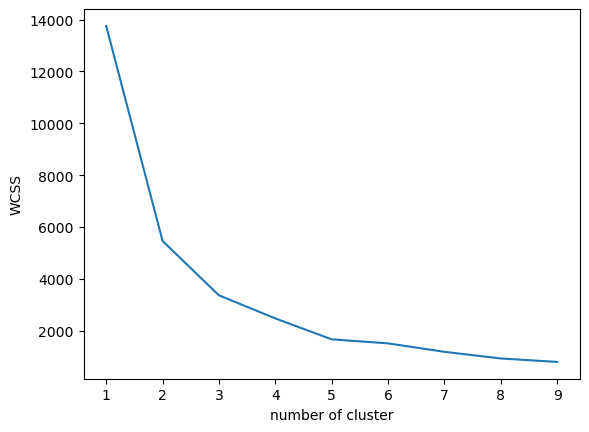

In [112]:
plt.plot(range(1,10),wcss)
plt.xlabel("number of cluster")
plt.ylabel("WCSS")
plt.show()

In [113]:
km1=KMeans(n_clusters=3,init='k-means++',random_state=4)
y_kmeans=km1.fit_predict(X)
y_kmeans

array([0, 0, 1, 2, 1, 0, 1, 0, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 0, 0, 2, 1, 2, 1, 1, 0, 2,
       1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 0, 2, 0, 2, 1, 1, 1,
       2, 2, 2, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 0, 2, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2,
       0, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       0, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 1, 2, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 2, 1, 1, 2, 2, 1, 1,
       0, 1, 2, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1,

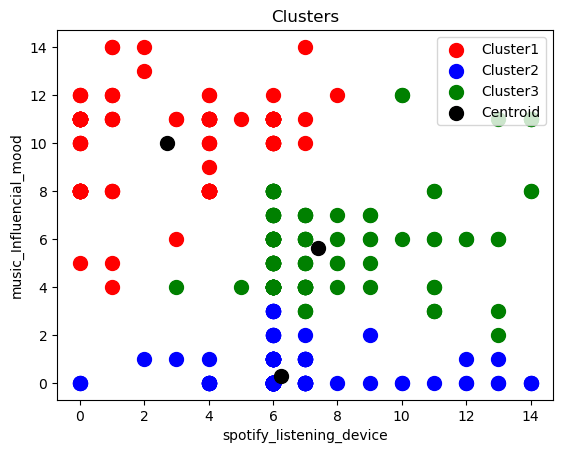

In [114]:
X=np.array(X)
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1],s = 100,c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1],s = 100,c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1],s = 100,c = 'green', label = 'Cluster3')
plt.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroid')
plt.title("Clusters")
plt.xlabel('spotify_listening_device')
plt.ylabel('music_Influencial_mood')
plt.legend()
plt.show()

In [115]:
X= pd.DataFrame(X,columns=('spotify_listening_device','music_Influencial_mood'))
y=np.array(y_kmeans)
X['cluster'] = y
X['spotify_listening_device']=le1.inverse_transform(X['spotify_listening_device'])
X['music_Influencial_mood']=le2.inverse_transform(X['music_Influencial_mood'])
X

,spotify_listening_device,music_Influencial_mood,cluster
0,Smart speakers or voice assistants,Sadness or melancholy,0
1,Computer or laptop,Social gatherings or parties,0
2,Smart speakers or voice assistants,Relaxation and stress relief,1
3,"Smartphone, Smart speakers or voice assistants","Relaxation and stress relief, Social gathering...",2
4,Smartphone,Relaxation and stress relief,1
...,...,...,...
515,"Smartphone, Computer or laptop, Wearable devices","Uplifting and motivational, Sadness or melancholy",2
516,"Smartphone, Computer or laptop","Relaxation and stress relief, Uplifting and mo...",2
517,Smartphone,Relaxation and stress relief,1
518,Smartphone,"Relaxation and stress relief, Uplifting and mo...",2


In [116]:
a=X.loc[X['cluster']==0][['spotify_listening_device','music_Influencial_mood','cluster']]
a

,spotify_listening_device,music_Influencial_mood,cluster
0,Smart speakers or voice assistants,Sadness or melancholy,0
1,Computer or laptop,Social gatherings or parties,0
5,Smartphone,Uplifting and motivational,0
7,Smartphone,Social gatherings or parties,0
17,Smartphone,Social gatherings or parties,0
...,...,...,...
500,Smartphone,Uplifting and motivational,0
502,Computer or laptop,Sadness or melancholy,0
503,Smart speakers or voice assistants,Uplifting and motivational,0
506,Smart speakers or voice assistants,Uplifting and motivational,0


In [117]:
a['spotify_listening_device'].value_counts()

spotify_listening_device
Computer or laptop                                                          51
Smart speakers or voice assistants                                          34
Smartphone                                                                  30
Computer or laptop, Smart speakers or voice assistants                      14
Smartphone, Computer or laptop                                               3
Computer or laptop, Wearable devices                                         3
Computer or laptop, Smart speakers or voice assistants, Wearable devices     2
Smartphone, Computer or laptop, Smart speakers or voice assistants           1
Smart speakers or voice assistants, Wearable devices                         1
Name: count, dtype: int64

In [118]:
a['music_Influencial_mood'].value_counts()

music_Influencial_mood
Uplifting and motivational                                                                                       63
Sadness or melancholy                                                                                            40
Social gatherings or parties                                                                                     16
Uplifting and motivational, Sadness or melancholy                                                                10
Uplifting and motivational, Social gatherings or parties                                                          4
Relaxation and stress relief, Uplifting and motivational, Sadness or melancholy                                   2
Relaxation and stress relief, Uplifting and motivational, Sadness or melancholy, Social gatherings or parties     1
Sadness or melancholy, Social gatherings or parties                                                               1
Uplifting and motivational, Sadness or melancholy

In [119]:
b=X.loc[X['cluster']==1][['spotify_listening_device','music_Influencial_mood','cluster']]
b

,spotify_listening_device,music_Influencial_mood,cluster
2,Smart speakers or voice assistants,Relaxation and stress relief,1
4,Smartphone,Relaxation and stress relief,1
6,Smartphone,Relaxation and stress relief,1
9,Smartphone,Relaxation and stress relief,1
12,"Smartphone, Computer or laptop",Relaxation and stress relief,1
...,...,...,...
511,Smartphone,Relaxation and stress relief,1
512,Smartphone,"Relaxation and stress relief, Sadness or melan...",1
514,Smartphone,Relaxation and stress relief,1
517,Smartphone,Relaxation and stress relief,1


In [120]:
b['spotify_listening_device'].value_counts()

spotify_listening_device
Smartphone                                                                              193
Smartphone, Computer or laptop                                                           19
Smart speakers or voice assistants                                                        9
Smartphone, Wearable devices                                                              3
Computer or laptop                                                                        3
Wearable devices                                                                          3
Smartphone, Smart speakers or voice assistants, Wearable devices                          3
Smartphone, Computer or laptop, Wearable devices                                          2
Smartphone, Computer or laptop, Smart speakers or voice assistants, Wearable devices      2
Smartphone, Smart speakers or voice assistants                                            1
Smartphone, Computer or laptop, Smart speakers or voice

In [121]:
b['music_Influencial_mood'].value_counts()

music_Influencial_mood
Relaxation and stress relief                                                         195
Relaxation and stress relief, Sadness or melancholy                                   33
Relaxation and stress relief, Sadness or melancholy, Social gatherings or parties      7
Relaxation and stress relief, Social gatherings or parties                             6
Name: count, dtype: int64

In [122]:
c=X.loc[X['cluster']==2][['spotify_listening_device','music_Influencial_mood','cluster']]
c

,spotify_listening_device,music_Influencial_mood,cluster
3,"Smartphone, Smart speakers or voice assistants","Relaxation and stress relief, Social gathering...",2
8,Smartphone,"Relaxation and stress relief, Uplifting and mo...",2
10,Smartphone,"Relaxation and stress relief, Uplifting and mo...",2
11,Smartphone,"Relaxation and stress relief, Uplifting and mo...",2
13,Smartphone,"Relaxation and stress relief, Uplifting and mo...",2
...,...,...,...
510,Smartphone,"Relaxation and stress relief, Uplifting and mo...",2
513,"Smartphone, Computer or laptop, Smart speakers...","Relaxation and stress relief, Uplifting and mo...",2
515,"Smartphone, Computer or laptop, Wearable devices","Uplifting and motivational, Sadness or melancholy",2
516,"Smartphone, Computer or laptop","Relaxation and stress relief, Uplifting and mo...",2


In [123]:
c['spotify_listening_device'].value_counts()

spotify_listening_device
Smartphone                                                                              77
Smartphone, Computer or laptop                                                          26
Smartphone, Smart speakers or voice assistants                                           9
Smartphone, Computer or laptop, Smart speakers or voice assistants, Wearable devices     6
Smartphone, Computer or laptop, Smart speakers or voice assistants                       5
Smartphone, Wearable devices                                                             5
Wearable devices                                                                         5
Smartphone, Computer or laptop, Wearable devices                                         3
Smartphone, Smart speakers or voice assistants, Wearable devices                         2
Computer or laptop, Wearable devices                                                     1
Smart speakers or voice assistants, Wearable devices             

In [124]:
c['music_Influencial_mood'].value_counts()

music_Influencial_mood
Relaxation and stress relief, Uplifting and motivational                                                         43
Relaxation and stress relief, Uplifting and motivational, Sadness or melancholy, Social gatherings or parties    34
Relaxation and stress relief, Uplifting and motivational, Sadness or melancholy                                  20
Sadness or melancholy                                                                                            15
Relaxation and stress relief, Uplifting and motivational, Social gatherings or parties                           14
Relaxation and stress relief, Social gatherings or parties                                                        7
Uplifting and motivational                                                                                        4
Uplifting and motivational, Sadness or melancholy                                                                 2
Relaxation and stress relief, Sadness or melancho

Summarizing the inferences Based on the above clusters.

-Cluster 1: Users prefer computer or laptop, Speakers or Voice Assistance(106) to hear Uplifting and motivational songs or in a party/social gathering(91).

-Cluster 2: Users prefer smartphones(may be connected to earphones)(193) to hear Relaxation and stress relief or Sad/Melancholy songs(228).

-Cluster 3: Users prefer smartphones(may be connected to earphones)(77) to hear Relaxation and stress relief or Sad/Melancholy songs Also uplifting and motivational songs(43).

In general, we can conclude that people who uses smartphones,chances are they may use headsets to listen more of Relaxation or stress relief or Sad/Melancholy songs and People tend to listen to uplifting/motivational songs or party songs in Laptops/smart speakers.

****END OF CODE****